In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

import yfinance as yf

from sklearn.linear_model import LinearRegression

### Get a sample stock price from 2019-01-01 to today

In [2]:
# Get the data of the Apple stock (code AAPL)
data = yf.download('FB','2019-01-01','2020-04-30')
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,134.449997,134.639999,129.949997,131.089996,131.089996,24625300
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100
2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300


### Extract the Close price column to plot

In [3]:
df = pd.DataFrame(data, columns=['Close'])
df = df.reset_index()
df.isna().values.any() # check for NaN
df.head()


,Date,Close
0,2018-12-31,131.089996
1,2019-01-02,135.679993
2,2019-01-03,131.740005
3,2019-01-04,137.949997
4,2019-01-07,138.050003


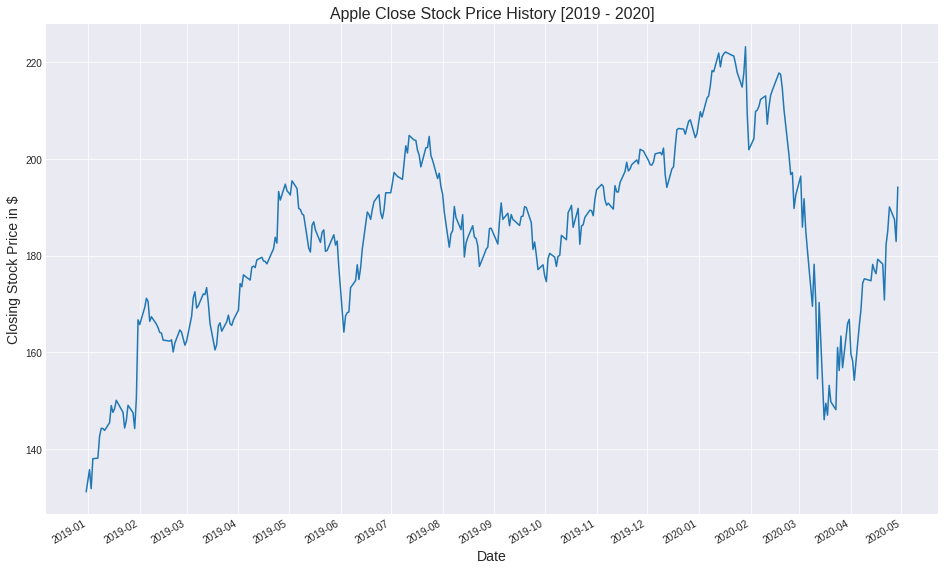

In [4]:
# Import matplotlib package for date plots

months = mdates.MonthLocator() # Get every year
dateFmt = mdates.DateFormatter('%Y-%m') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)

# Set figure title
plt.title('Apple Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

### Get stock of Apple, Google, Microsoft, Amazon, Facebook via Yahoo Finance

In [5]:
def get_close_stock_price(codes, start_date='2019-01-01', end_date='2020-04-30'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
    return df
#'AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'
df = get_close_stock_price(['AMZN'])

df.to_csv('close_price_big_5.csv')


[*********************100%***********************]  1 of 1 completed


In [6]:
df = pd.read_csv('close_price_big_5.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df.head()

,AMZN
Date,
2018-12-31,1501.969971
2019-01-02,1539.130005
2019-01-03,1500.280029
2019-01-04,1575.390015
2019-01-07,1629.510010


In [7]:
df.index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-04-16', '2020-04-17', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-27',
               '2020-04-28', '2020-04-29'],
              dtype='datetime64[ns]', name='Date', length=335, freq=None)

In [8]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

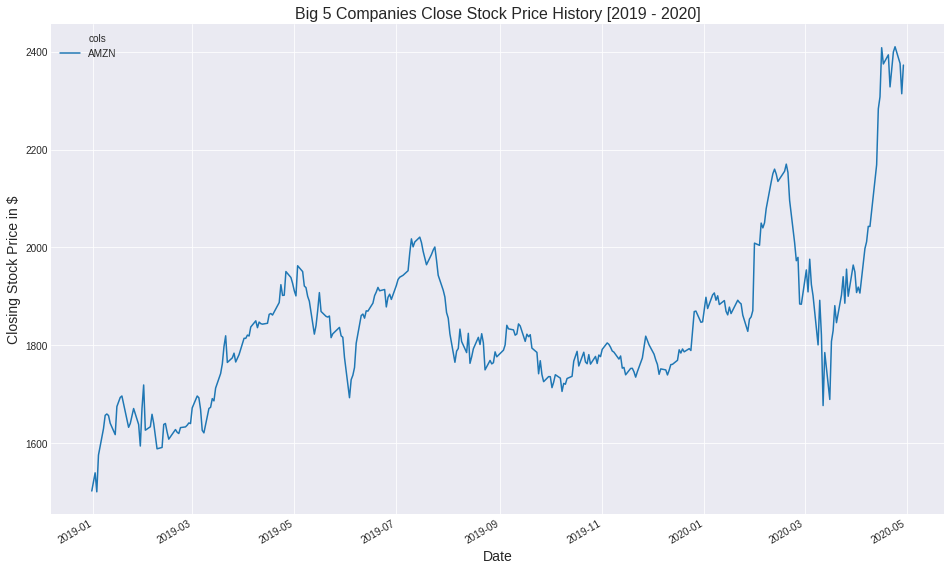

In [9]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

**Task2: Investigate if stock price of Big 5 companies are related to each other ( “FAAMG”—Facebook, Amazon, Apple, Microsoft, and Google )**


In [10]:
df_2 = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'])
df_2.to_csv('close_price_big_5_2.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
# độ tương quan giữa các dữ  liệu  ,  ứng dụng là kiểm  tra tính tương quan  giữa các cột và có thể loại bỏ
# các  cột có  tính  tương quan cao
pearsoncorr = df_2.corr(method='pearson')
pearsoncorr
# output : 

,AAPL,GOOGL,MSFT,AMZN,FB
AAPL,1.000000,0.875474,0.945812,0.554473,0.696028
GOOGL,0.875474,1.000000,0.773780,0.399231,0.772271
MSFT,0.945812,0.773780,1.000000,0.723971,0.689732
AMZN,0.554473,0.399231,0.723971,1.000000,0.455029
FB,0.696028,0.772271,0.689732,0.455029,1.000000


**Task 3 : Determine feature  predict stock - Feature Generation<br>**

Lưu ý : với feature này thì em test trên  từng dữ liệu công ty một ạ <br>

 The features use in model are  : 
+ Maximum : Maximum price received during the selected time 
+ Minimum : Minimum price received during the selected time 
+ Average : Average price received during the selected time  
+ Avarage Log Return :logarithmic difference between average prices of two consecutive hours : <br>
$\ln\frac{p(t)}{p(t-1)}$ <br>
where p(t) is the average price at time t 
+ Stadard Deviation : $\sqrt{\frac{1}{N-1}*\sum_{i=1}^n (xi-\frac{\sum{pi}}{count(pi))})^2}$ <br> 
  
+ Reference paper 
https://drive.google.com/file/d/1IBvMi6a8y9pD9sibNeF0sUh9CTN0UKF_/view?usp=sharing


**Task 4: Build a linear regression model to predict future stock price**



In [37]:
# standard deviation
def standard_d (past_price, N ):
    sum = np.sum((past_price-np.mean(past_price))**2)
    return np.sqrt(sum/N)

# average log return 
def mean_log_return ( past_price ):
    
    x1 = np.mean(past_price).values.reshape(-1)
    
    x2 = np.mean(past_price.shift(1)).values.reshape(-1)
    
    return  np.log(x1/x2)


# hàm chuẩn hóa dữ liệu 
def minMaxScaler ( X ):
    scaler = MinMaxScaler()
    scaler.fit(X)
    transform_X = scaler.transform(X)
    return transform_X

# get  feature 
def create_feature ( past_price , p , history =1):
    # max
    max_of_stock = np.max(past_price)
    
    # mean
    min_of_stock = np.min(past_price)
    
    
    # average
    average_of_stock= np.mean(past_price)
    
    
    # standard devitation, history = N
    sd  = standard_d(past_price,history)
    #print(sd)
    
    # average log return
    average_log_return = mean_log_return(p)
    print(average_log_return)
    
    
    
    return max_of_stock , min_of_stock , average_of_stock ,sd , average_log_return
        

In [43]:

def create_Xy(df, history=1):
    
    X,y,dates = [],[],[] 
   
    #df['lr']= np.log(df/df.shift(1))
    #print(df.head(10))
    for row_idx in range(history, len(df)):
        
    
        # past price after history
        past_price = df.iloc[row_idx-history:row_idx,:].values.reshape(-1)
        p = df.iloc[row_idx-history:row_idx,:]
        # present price 
        present_price = df.iloc[row_idx,:].values.reshape(-1)
        
        
        
        
        
        # get feature  < max, min , mean , standard devitation , mean_log_return > 
        max_of_stock, min_of_stock, average_of_stock,sd ,mean_log_return = create_feature(past_price,p,history)
        
        # future
        y.append(present_price)
        
        # predict 
        X.append(np.array([max_of_stock, min_of_stock, average_of_stock,sd, mean_log_return]))
        dates.append(df.index[row_idx])

    X = np.array(minMaxScaler(X))
    y = np.array(y)
    return X,y,dates


X,y,dates = create_Xy(df, history=10)


# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]


[0.00136288]
[0.00411428]
[0.00371861]
[0.00300867]
[0.00237621]
[-0.00192617]
[-0.00129259]
[-0.000265]
[0.00068604]
[-0.00148245]
[-0.00426997]
[0.00088006]
[0.00388289]
[-0.0018707]
[-0.00097765]
[0.00056094]
[-0.00068938]
[-0.00216246]
[-0.00338502]
[-0.00288828]
[4.95190848e-06]
[0.00034708]
[-0.00018019]
[-0.00106082]
[0.00032149]
[0.00019806]
[0.00015859]
[0.00087268]
[0.00066217]
[0.00058246]
[0.0008816]
[0.00079672]
[0.00263396]
[0.00368004]
[0.00297401]
[0.00106862]
[-0.0018635]
[-0.00213806]
[0.00095453]
[0.0008727]
[0.00172123]
[0.00110142]
[0.00256701]
[0.00423343]
[0.005061]
[0.00650919]
[0.00660884]
[0.00211489]
[0.00204644]
[0.00193407]
[0.00031178]
[0.00024744]
[0.0002772]
[0.00191234]
[0.00156931]
[0.00183925]
[0.00172743]
[0.00241199]
[0.00271154]
[0.00152157]
[0.00171826]
[0.00108256]
[0.00063946]
[0.0005622]
[0.00136222]
[0.00120024]
[0.0007516]
[0.00198673]
[0.00371881]
[0.00199914]
[0.00169669]
[0.00391777]
[0.00261855]
[0.00143219]
[0.00027105]
[-0.00056102]
[0.

### Create X, y matrices for regression
Use history = number of days before prediction date

### Create a Linear Regression Model to predict stock price

In [44]:
clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)


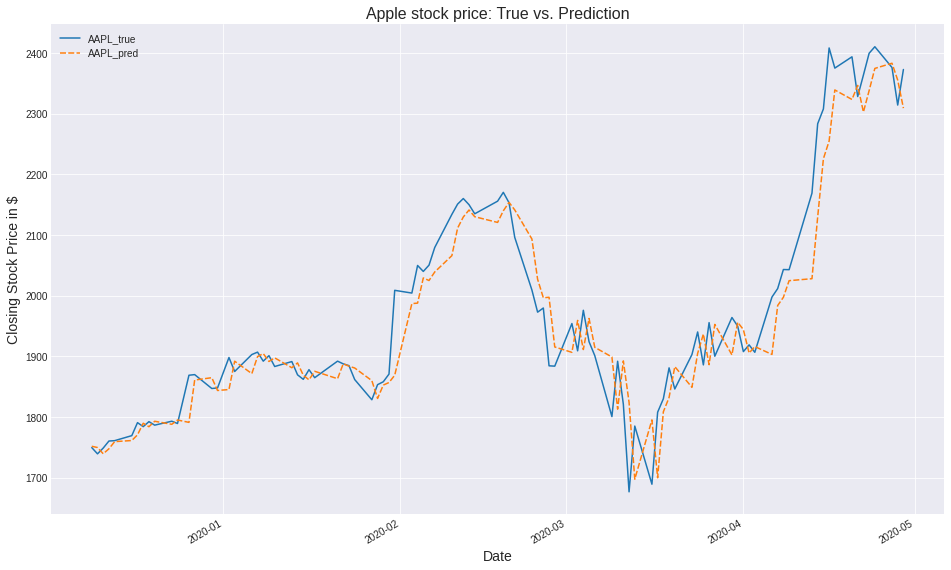

In [45]:
df_plot = pd.DataFrame({"AAPL_true": y_test[:,0], 'AAPL_pred': ypred[:,0]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Apple stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

**Task 5 : Evaluate model** <br>
+ Mean squared error and root mean  squared error 
+ R2 Score 


In [46]:
# mean squared error
mse = np.sum((ypred - y_test)**2)
print(mse)
# root mean squared error
# m is the number of training examples
rmse = np.sqrt(mse/len(y_train))
print(rmse)

292482.27304401156
35.89523872590177


In [47]:
# sum of square of residuals
ssr = np.sum((ypred - y_test)**2)

#  total sum of squares
sst = np.sum((y_test - np.mean(y_test))**2)

# R2 score
r2_score = 1 - (ssr/sst)
r2_score

0.9114121136075315

# Exercise
1. Play with the above code to get familiar with stock price data and ways to create training data ( X = past stock price, y = future stock price )
2. Investigate if stock price of Big 5 companies are related to each other ( “FAAMG”—Facebook, Amazon, Apple, Microsoft, and Google )
3. Determine the features that could predict future stock price ( stock price from Yahoo Finance could be considered as raw features, create new features if needed )
4. Build a linear regression model to predict future stock price
5. Evaluate your model performance